### Contents: <a class="anchor" id="top"></a>
### [Hypothesis Test](#p1)
### [Feature Engineering](#p2) 
### [Modeling](#p3) 
---


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read Data

In [22]:
## read data
df = pd.read_csv('../data/DMC_2016_task_01/orders_train.txt', sep = ';')
print('Number of records between {} to {}: {}'.format(df['orderDate'].iloc[0], df['orderDate'].iloc[-1], len(df)))
print('Number of attributes corresponding to a single record {}:'.format(df.shape[1]-1))
df.head()

Number of records between 2014-01-01 to 2015-09-30: 2325165
Number of attributes corresponding to a single record 14:


,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
0,a1000001,2014-01-01,i1000382,1972,44,3.0,1,10.00,29.99,0,0.0,c1010575,2,BPRG,0
1,a1000001,2014-01-01,i1000550,3854,44,3.0,1,20.00,39.99,0,0.0,c1010575,2,BPRG,0
2,a1000002,2014-01-01,i1001991,2974,38,8.0,1,35.00,49.99,0,0.0,c1045905,4,BPRG,0
3,a1000002,2014-01-01,i1001999,1992,38,8.0,1,49.99,49.99,0,0.0,c1045905,4,BPRG,1
4,a1000003,2014-01-01,i1001942,1968,42,8.0,1,10.00,35.99,0,0.0,c1089295,2,PAYPALVC,0


In [23]:
## make a copy of the dataframe
data = df.copy()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325165 entries, 0 to 2325164
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   orderID         object 
 1   orderDate       object 
 2   articleID       object 
 3   colorCode       int64  
 4   sizeCode        object 
 5   productGroup    float64
 6   quantity        int64  
 7   price           float64
 8   rrp             float64
 9   voucherID       object 
 10  voucherAmount   float64
 11  customerID      object 
 12  deviceID        int64  
 13  paymentMethod   object 
 14  returnQuantity  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 266.1+ MB


In [25]:
#check NA values
print(data.isna().sum())
#drop NA values since not a significant number of records contain NA
data = data.dropna()

orderID             0
orderDate           0
articleID           0
colorCode           0
sizeCode            0
productGroup      351
quantity            0
price               0
rrp               351
voucherID           6
voucherAmount       0
customerID          0
deviceID            0
paymentMethod       0
returnQuantity      0
dtype: int64


In [26]:
print(data.isna().sum())

orderID           0
orderDate         0
articleID         0
colorCode         0
sizeCode          0
productGroup      0
quantity          0
price             0
rrp               0
voucherID         0
voucherAmount     0
customerID        0
deviceID          0
paymentMethod     0
returnQuantity    0
dtype: int64


In [27]:
## inconsistent records
drop_idx = data[(data['quantity']==0) | (data['price']==0) | (data['quantity']<data['returnQuantity'])].index
data = data.drop(drop_idx)
data.shape

(2277968, 15)

In [28]:
#return rate by quantity
rrq = data['returnQuantity'].sum()/data['quantity'].sum()
print(rrq)

#return rate by order
rro= data[data['returnQuantity']>0].shape[0]/data[data['quantity']>0].shape[0]
print(rro)

0.5265848252730028
0.529593918790782


In [29]:
data.head()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
0,a1000001,2014-01-01,i1000382,1972,44,3.0,1,10.00,29.99,0,0.0,c1010575,2,BPRG,0
1,a1000001,2014-01-01,i1000550,3854,44,3.0,1,20.00,39.99,0,0.0,c1010575,2,BPRG,0
2,a1000002,2014-01-01,i1001991,2974,38,8.0,1,35.00,49.99,0,0.0,c1045905,4,BPRG,0
3,a1000002,2014-01-01,i1001999,1992,38,8.0,1,49.99,49.99,0,0.0,c1045905,4,BPRG,1
4,a1000003,2014-01-01,i1001942,1968,42,8.0,1,10.00,35.99,0,0.0,c1089295,2,PAYPALVC,0


## Hypothesis Test: Are orders that use vouchers more or less likely to be returned? <a class="anchor" id="p1"></a>
[back to top](#top)  

**Null:** There exists no difference in the probabilities of return between customers who use a voucher and those who do not. 

**Alternate:** The probability of return is higher for customers who used a voucher than for customers who did not. 

**Level of significance:** 0.05

In [30]:
order_df = pd.read_csv('fashion_train_order_df.csv')

In [31]:
order_df.head()

,Unnamed: 0,orderID,orderDate,articleID,colorCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,paymentMethod,returnQuantity,bin_return
0,0,a1000001,2014-01-01,"['i1000382', 'i1000550']","[1972, 3854]","[3.0, 3.0]",2,30.00,69.98,0,0.0,c1010575,BPRG,0,0
1,1,a1000002,2014-01-01,"['i1001991', 'i1001999']","[2974, 1992]","[8.0, 8.0]",2,84.99,99.98,0,0.0,c1045905,BPRG,1,1
2,2,a1000003,2014-01-01,"['i1001942', 'i1001942', 'i1001974', 'i1001976']","[1968, 1972, 1001, 3976]","[8.0, 8.0, 8.0, 8.0]",4,60.00,151.96,0,0.0,c1089295,PAYPALVC,0,0
3,3,a1000004,2014-01-01,['i1002457'],[1001],[14.0],1,89.99,89.99,0,0.0,c1050116,BPRG,1,1
4,4,a1000005,2014-01-01,"['i1000366', 'i1000406', 'i1000406']","[1968, 3972, 3972]","[3.0, 3.0, 3.0]",3,35.00,99.97,0,0.0,c1089296,BPRG,3,1


In [32]:
orders_used_voucher_count = order_df.loc[(order_df['voucherAmount']!=0)]['orderID'].count()
orders_no_voucher_count = order_df.loc[(order_df['voucherAmount']==0)]['orderID'].count()

In [33]:
voucher_returns = order_df.loc[(order_df['voucherAmount']!=0)]['bin_return'].sum()
other_returns = order_df.loc[(order_df['voucherAmount']==0)]['bin_return'].sum()

In [34]:
# calculate probabilities
p1 = voucher_returns/orders_used_voucher_count
p2 = other_returns/orders_no_voucher_count

In [35]:
# test statistic
p1-p2

0.06119640432471429

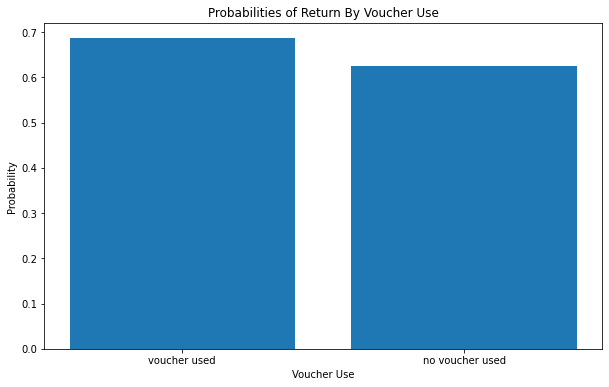

In [36]:
# plot
plt.figure(figsize=(10,6))
plt.bar(['voucher used', 'no voucher used'], [p1,p2])
plt.title('Probabilities of Return By Voucher Use')
plt.xlabel('Voucher Use')
plt.ylabel('Probability')
plt.show()

In [43]:
order_df.head()

,Unnamed: 0,orderID,orderDate,articleID,colorCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,paymentMethod,returnQuantity,bin_return
0,0,a1000001,2014-01-01,"['i1000382', 'i1000550']","[1972, 3854]","[3.0, 3.0]",2,30.00,69.98,0,0.0,c1010575,BPRG,0,0
1,1,a1000002,2014-01-01,"['i1001991', 'i1001999']","[2974, 1992]","[8.0, 8.0]",2,84.99,99.98,0,0.0,c1045905,BPRG,1,1
2,2,a1000003,2014-01-01,"['i1001942', 'i1001942', 'i1001974', 'i1001976']","[1968, 1972, 1001, 3976]","[8.0, 8.0, 8.0, 8.0]",4,60.00,151.96,0,0.0,c1089295,PAYPALVC,0,0
3,3,a1000004,2014-01-01,['i1002457'],[1001],[14.0],1,89.99,89.99,0,0.0,c1050116,BPRG,1,1
4,4,a1000005,2014-01-01,"['i1000366', 'i1000406', 'i1000406']","[1968, 3972, 3972]","[3.0, 3.0, 3.0]",3,35.00,99.97,0,0.0,c1089296,BPRG,3,1


In [44]:
vouch_df = order_df[['orderID', 'voucherAmount', 'bin_return']]
vouch_df.head(3)

,orderID,voucherAmount,bin_return
0,a1000001,0.0,0
1,a1000002,0.0,1
2,a1000003,0.0,0


In [45]:
# generate a computational null distribution by randomization:


# Calculate the total number of orders that used vouchers or did not use vouchers. Note that these quantities will
## not change throughout the following for loop, so there is no need to recalculate upon every iteration.
orders_used_voucher_count = vouch_df.loc[(order_df['voucherAmount']!=0)]['orderID'].count()
orders_no_voucher_count = vouch_df.loc[(order_df['voucherAmount']==0)]['orderID'].count()

prob_diff_lst = []

# repeat 1000 times
for _ in range(1000):
    # shuffle returned status for the orders
    shuffled_returns = np.random.permutation(vouch_df['bin_return'].values)
    
    # add shuffled returns column to the dataframe
    vouch_df = pd.concat([vouch_df, pd.Series(shuffled_returns)], axis=1)
    vouch_df.columns = ['orderID', 'voucherAmount', 'bin_return', 'shuffled_returns']
    
    # calculate the number of orders with a returned item given voucher status
    voucher_returns = vouch_df.loc[(order_df['voucherAmount']!=0)]['shuffled_returns'].sum()
    other_returns = vouch_df.loc[(order_df['voucherAmount']==0)]['shuffled_returns'].sum()
    
    # calculate the approx. probabilities of a return given voucher status
    p1 = voucher_returns/orders_used_voucher_count
    p2 = other_returns/orders_no_voucher_count
    
    prob_diff = p1-p2
    prob_diff_lst.append(prob_diff)
    
    # remove shuffled returns column from the dataframe
    vouch_df = vouch_df.drop('shuffled_returns', axis=1)
    


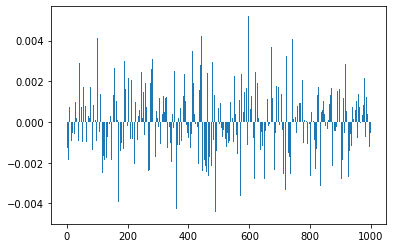

In [46]:
# null distribution visualization
plt.bar(range(len(prob_diff_lst)), prob_diff_lst);

In [47]:
# p-value
sum(np.array(prob_diff_lst) >= (0.06119640432471429)) / len(prob_diff_lst)

0.0

P-value is smaller than level of significance, thus we reject the null. 

# Feature Engineering <a class="anchor" id="p2"></a>
[back to top](#top)  

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# dropping sizes A and I for now...
data = data[~data['sizeCode'].isin(['A', 'I'])]

In [50]:
data.head()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
0,a1000001,2014-01-01,i1000382,1972,44,3.0,1,10.00,29.99,0,0.0,c1010575,2,BPRG,0
1,a1000001,2014-01-01,i1000550,3854,44,3.0,1,20.00,39.99,0,0.0,c1010575,2,BPRG,0
2,a1000002,2014-01-01,i1001991,2974,38,8.0,1,35.00,49.99,0,0.0,c1045905,4,BPRG,0
3,a1000002,2014-01-01,i1001999,1992,38,8.0,1,49.99,49.99,0,0.0,c1045905,4,BPRG,1
4,a1000003,2014-01-01,i1001942,1968,42,8.0,1,10.00,35.99,0,0.0,c1089295,2,PAYPALVC,0


In [51]:
data[data['quantity']>1].head()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
125,a1000047,2014-01-01,i1000567,1493,42,3.0,2,30.00,19.99,0,0.0,c1002626,2,BPRG,0
129,a1000049,2014-01-01,i1000663,1000,42,3.0,2,35.98,17.99,0,0.0,c1089313,2,BPRG,0
476,a1000162,2014-01-01,i1000566,1974,44,3.0,2,30.00,19.99,0,0.0,c1015392,2,VORAUS,0
477,a1000162,2014-01-01,i1000566,1976,44,3.0,2,30.00,19.99,0,0.0,c1015392,2,VORAUS,0
958,a1000321,2014-01-01,i1000314,1493,40,3.0,2,45.98,22.99,0,0.0,c1089417,2,BPRG,2


In [52]:
uniq_order_df2 = data.groupby('orderID', as_index=False).agg({'orderDate': 'first',
                                                            'articleID': list,
                                                            'colorCode': list, 
                                                            'sizeCode': list,
                                                            'productGroup': list, 
                                                            'quantity': np.sum,  
                                                            'price': np.sum,  
                                                            'rrp': np.sum,
                                                            'voucherID': 'first',
                                                            'voucherAmount': 'first',
                                                            'customerID': 'first',
                                                            'paymentMethod': 'first',
                                                            'returnQuantity': np.sum})
uniq_order_df2.head()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,paymentMethod,returnQuantity
0,a1000001,2014-01-01,"[i1000382, i1000550]","[1972, 3854]","[44, 44]","[3.0, 3.0]",2,30.00,69.98,0,0.0,c1010575,BPRG,0
1,a1000002,2014-01-01,"[i1001991, i1001999]","[2974, 1992]","[38, 38]","[8.0, 8.0]",2,84.99,99.98,0,0.0,c1045905,BPRG,1
2,a1000003,2014-01-01,"[i1001942, i1001942, i1001974, i1001976]","[1968, 1972, 1001, 3976]","[42, 42, 42, 44]","[8.0, 8.0, 8.0, 8.0]",4,60.00,151.96,0,0.0,c1089295,PAYPALVC,0
3,a1000004,2014-01-01,[i1002457],[1001],[42],[14.0],1,89.99,89.99,0,0.0,c1050116,BPRG,1
4,a1000005,2014-01-01,"[i1000366, i1000406, i1000406]","[1968, 3972, 3972]","[42, 40, 42]","[3.0, 3.0, 3.0]",3,35.00,99.97,0,0.0,c1089296,BPRG,3


In [53]:
#add a binary return variable
uniq_order_df2['bin_return'] = uniq_order_df2['returnQuantity'].apply(lambda x: int(x!=0))
uniq_order_df2.head()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,paymentMethod,returnQuantity,bin_return
0,a1000001,2014-01-01,"[i1000382, i1000550]","[1972, 3854]","[44, 44]","[3.0, 3.0]",2,30.00,69.98,0,0.0,c1010575,BPRG,0,0
1,a1000002,2014-01-01,"[i1001991, i1001999]","[2974, 1992]","[38, 38]","[8.0, 8.0]",2,84.99,99.98,0,0.0,c1045905,BPRG,1,1
2,a1000003,2014-01-01,"[i1001942, i1001942, i1001974, i1001976]","[1968, 1972, 1001, 3976]","[42, 42, 42, 44]","[8.0, 8.0, 8.0, 8.0]",4,60.00,151.96,0,0.0,c1089295,PAYPALVC,0,0
3,a1000004,2014-01-01,[i1002457],[1001],[42],[14.0],1,89.99,89.99,0,0.0,c1050116,BPRG,1,1
4,a1000005,2014-01-01,"[i1000366, i1000406, i1000406]","[1968, 3972, 3972]","[42, 40, 42]","[3.0, 3.0, 3.0]",3,35.00,99.97,0,0.0,c1089296,BPRG,3,1


In [54]:
uniq_order_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727840 entries, 0 to 727839
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   orderID         727840 non-null  object 
 1   orderDate       727840 non-null  object 
 2   articleID       727840 non-null  object 
 3   colorCode       727840 non-null  object 
 4   sizeCode        727840 non-null  object 
 5   productGroup    727840 non-null  object 
 6   quantity        727840 non-null  int64  
 7   price           727840 non-null  float64
 8   rrp             727840 non-null  float64
 9   voucherID       727840 non-null  object 
 10  voucherAmount   727840 non-null  float64
 11  customerID      727840 non-null  object 
 12  paymentMethod   727840 non-null  object 
 13  returnQuantity  727840 non-null  int64  
 14  bin_return      727840 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 88.8+ MB


### SizeCode Mapping

In [55]:
# create a size mapping function so that the sizes are all on the same scale
def sizeCode_map(lst):
    '''Convert non-standard sizes to standard size scale.'''
    
    # mapping found by a teammate using frequent itemset method
    mapping = {'75':'34', '80': '36', '85': '38', '90': '38', '95': '40', '100': '42', 'XS':'34', 'S': '36',  'M': '38','L':'42',
    'XL':'42', '24':'34', '25':'34' , '26':'36', '27':'36', '28':'38','29': '38','30':'40','31':'40','32':'42', '33':'42'}

    new_lst = []
    for elt in lst:
        if str(elt) in mapping.keys():  # only if the size is in the dictionary keys, must it be converted
            new_lst.append(mapping[str(elt)])
        else:
            new_lst.append(str(elt))
    
    return new_lst

In [56]:
# apply sizeCode mapping 
uniq_order_df2['sizeCodes'] = uniq_order_df2['sizeCode'].apply(sizeCode_map)

In [57]:
uniq_order_df2.head()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,paymentMethod,returnQuantity,bin_return,sizeCodes
0,a1000001,2014-01-01,"[i1000382, i1000550]","[1972, 3854]","[44, 44]","[3.0, 3.0]",2,30.00,69.98,0,0.0,c1010575,BPRG,0,0,"[44, 44]"
1,a1000002,2014-01-01,"[i1001991, i1001999]","[2974, 1992]","[38, 38]","[8.0, 8.0]",2,84.99,99.98,0,0.0,c1045905,BPRG,1,1,"[38, 38]"
2,a1000003,2014-01-01,"[i1001942, i1001942, i1001974, i1001976]","[1968, 1972, 1001, 3976]","[42, 42, 42, 44]","[8.0, 8.0, 8.0, 8.0]",4,60.00,151.96,0,0.0,c1089295,PAYPALVC,0,0,"[42, 42, 42, 44]"
3,a1000004,2014-01-01,[i1002457],[1001],[42],[14.0],1,89.99,89.99,0,0.0,c1050116,BPRG,1,1,[42]
4,a1000005,2014-01-01,"[i1000366, i1000406, i1000406]","[1968, 3972, 3972]","[42, 40, 42]","[3.0, 3.0, 3.0]",3,35.00,99.97,0,0.0,c1089296,BPRG,3,1,"[42, 40, 42]"


### Counting

In [58]:
def count_unique_elts(lst):
    return len(set(lst))

In [59]:
def count_equal_elts(lst):
    '''e.g., if the list of articles bought in the order is 
    ['i1000366', 'i1000406', 'i1000406', 'i1001942', 'i1001942', 'i1001942'], 
    the function would return 2 + 3, for the two i1000406 and three i1001942 articles.'''
    
    dictionary = {}

    # initialize the dictionary
    for elt in lst:
        dictionary[elt] = 0

    # update the dictionary
    for elt in lst:
        dictionary[elt] += 1
    
    # count equal items
    summ = 0
    for tot in dictionary.values():
        if tot > 1:
            summ+=tot
    
    return summ

In [60]:
count_equal_elts([8.0, 8.0, 8.0, 8.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0])

8

In [61]:
# Count unique and equal elements of the listed features

uniq_order_df2['num_uniq_colors'] = uniq_order_df2['colorCode'].apply(count_unique_elts)
uniq_order_df2['num_uniq_sizes'] = uniq_order_df2['sizeCodes'].apply(count_unique_elts)
uniq_order_df2['num_uniq_articles'] = uniq_order_df2['articleID'].apply(count_unique_elts)
uniq_order_df2['num_equal_articles'] = uniq_order_df2['articleID'].apply(count_equal_elts)
uniq_order_df2['num_uniq_product_group'] = uniq_order_df2['productGroup'].apply(count_unique_elts)
uniq_order_df2['num_equal_product_group'] = uniq_order_df2['productGroup'].apply(count_equal_elts)

uniq_order_df2.head()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,...,paymentMethod,returnQuantity,bin_return,sizeCodes,num_uniq_colors,num_uniq_sizes,num_uniq_articles,num_equal_articles,num_uniq_product_group,num_equal_product_group
0,a1000001,2014-01-01,"[i1000382, i1000550]","[1972, 3854]","[44, 44]","[3.0, 3.0]",2,30.00,69.98,0,...,BPRG,0,0,"[44, 44]",2,1,2,0,1,2
1,a1000002,2014-01-01,"[i1001991, i1001999]","[2974, 1992]","[38, 38]","[8.0, 8.0]",2,84.99,99.98,0,...,BPRG,1,1,"[38, 38]",2,1,2,0,1,2
2,a1000003,2014-01-01,"[i1001942, i1001942, i1001974, i1001976]","[1968, 1972, 1001, 3976]","[42, 42, 42, 44]","[8.0, 8.0, 8.0, 8.0]",4,60.00,151.96,0,...,PAYPALVC,0,0,"[42, 42, 42, 44]",4,2,3,2,1,4
3,a1000004,2014-01-01,[i1002457],[1001],[42],[14.0],1,89.99,89.99,0,...,BPRG,1,1,[42],1,1,1,0,1,0
4,a1000005,2014-01-01,"[i1000366, i1000406, i1000406]","[1968, 3972, 3972]","[42, 40, 42]","[3.0, 3.0, 3.0]",3,35.00,99.97,0,...,BPRG,3,1,"[42, 40, 42]",2,2,2,2,1,3


### Holiday binary variable

In [62]:
# Add a holiday month binary variable

# Not my code below
## extract day, month, year, weekday from orderDate column
format = '%Y-%m-%d'
uniq_order_df2['orderDate'] = pd.to_datetime(uniq_order_df2['orderDate'], format=format)

# Extracting components
uniq_order_df2['day'] = uniq_order_df2['orderDate'].dt.day
uniq_order_df2['month'] = uniq_order_df2['orderDate'].dt.month
uniq_order_df2['year'] = uniq_order_df2['orderDate'].dt.year
uniq_order_df2['weekend'] = uniq_order_df2['orderDate'].dt.dayofweek
uniq_order_df2['weekend'] = uniq_order_df2['weekend'].apply(lambda x: 0 if 0 <= x <= 4 else 1)

# add binary variable
uniq_order_df2['holiday_month'] = uniq_order_df2['month'].apply(lambda x: 1 if x in [11,12] else 0)

uniq_order_df2.head()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,...,num_uniq_sizes,num_uniq_articles,num_equal_articles,num_uniq_product_group,num_equal_product_group,day,month,year,weekend,holiday_month
0,a1000001,2014-01-01,"[i1000382, i1000550]","[1972, 3854]","[44, 44]","[3.0, 3.0]",2,30.00,69.98,0,...,1,2,0,1,2,1,1,2014,0,0
1,a1000002,2014-01-01,"[i1001991, i1001999]","[2974, 1992]","[38, 38]","[8.0, 8.0]",2,84.99,99.98,0,...,1,2,0,1,2,1,1,2014,0,0
2,a1000003,2014-01-01,"[i1001942, i1001942, i1001974, i1001976]","[1968, 1972, 1001, 3976]","[42, 42, 42, 44]","[8.0, 8.0, 8.0, 8.0]",4,60.00,151.96,0,...,2,3,2,1,4,1,1,2014,0,0
3,a1000004,2014-01-01,[i1002457],[1001],[42],[14.0],1,89.99,89.99,0,...,1,1,0,1,0,1,1,2014,0,0
4,a1000005,2014-01-01,"[i1000366, i1000406, i1000406]","[1968, 3972, 3972]","[42, 40, 42]","[3.0, 3.0, 3.0]",3,35.00,99.97,0,...,2,2,2,1,3,1,1,2014,0,0


### Customer groupings

In [63]:
# add customer grouping using customer clusters

# obtain customer clusters from work of a teammate
cust_group_df = pd.read_csv('../data/DMC_2016_task_01/cust_group.csv')
cust_group_df.head()

,Unnamed: 0,customerID,totalOrdersPerCustomer,sizeCodePerCustomer,totalDevicesPerCustomer,aveargeOrderValPerCustomer,cluster
0,0,c1010575,2,1,1,28.50,1
1,4,c1045905,1,1,1,84.99,1
2,6,c1089295,1,2,1,60.00,4
3,10,c1050116,1,1,1,89.99,1
4,11,c1089296,4,3,1,106.75,4


In [64]:
# merge dataframes 
uniq_order_df2 = pd.merge(uniq_order_df2, cust_group_df.loc[:, ['customerID', 'cluster']], on = 'customerID')
uniq_order_df2 = uniq_order_df2.rename(columns={'cluster': 'customerGroup'})
uniq_order_df2.head()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,...,num_uniq_articles,num_equal_articles,num_uniq_product_group,num_equal_product_group,day,month,year,weekend,holiday_month,customerGroup
0,a1000001,2014-01-01,"[i1000382, i1000550]","[1972, 3854]","[44, 44]","[3.0, 3.0]",2,30.00,69.98,0,...,2,0,1,2,1,1,2014,0,0,1
1,a1155949,2014-05-27,"[i1000579, i1000629]","[3974, 1894]","[44, 44]","[3.0, 3.0]",2,27.00,65.98,0,...,2,0,1,2,27,5,2014,0,0,1
2,a1000002,2014-01-01,"[i1001991, i1001999]","[2974, 1992]","[38, 38]","[8.0, 8.0]",2,84.99,99.98,0,...,2,0,1,2,1,1,2014,0,0,1
3,a1000003,2014-01-01,"[i1001942, i1001942, i1001974, i1001976]","[1968, 1972, 1001, 3976]","[42, 42, 42, 44]","[8.0, 8.0, 8.0, 8.0]",4,60.00,151.96,0,...,3,2,1,4,1,1,2014,0,0,4
4,a1000004,2014-01-01,[i1002457],[1001],[42],[14.0],1,89.99,89.99,0,...,1,0,1,0,1,1,2014,0,0,1


### OHE

#### payment methods

In [65]:
# OHE (one-hot-encode) payment method variable
uniq_order_df2 = pd.get_dummies(uniq_order_df2, columns=['paymentMethod'])

In [66]:
uniq_order_df2.head()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,...,paymentMethod_BPLS,paymentMethod_BPPL,paymentMethod_BPRG,paymentMethod_CBA,paymentMethod_KGRG,paymentMethod_KKE,paymentMethod_NN,paymentMethod_PAYPALVC,paymentMethod_RG,paymentMethod_VORAUS
0,a1000001,2014-01-01,"[i1000382, i1000550]","[1972, 3854]","[44, 44]","[3.0, 3.0]",2,30.00,69.98,0,...,0,0,1,0,0,0,0,0,0,0
1,a1155949,2014-05-27,"[i1000579, i1000629]","[3974, 1894]","[44, 44]","[3.0, 3.0]",2,27.00,65.98,0,...,0,0,1,0,0,0,0,0,0,0
2,a1000002,2014-01-01,"[i1001991, i1001999]","[2974, 1992]","[38, 38]","[8.0, 8.0]",2,84.99,99.98,0,...,0,0,1,0,0,0,0,0,0,0
3,a1000003,2014-01-01,"[i1001942, i1001942, i1001974, i1001976]","[1968, 1972, 1001, 3976]","[42, 42, 42, 44]","[8.0, 8.0, 8.0, 8.0]",4,60.00,151.96,0,...,0,0,0,0,0,0,0,1,0,0
4,a1000004,2014-01-01,[i1002457],[1001],[42],[14.0],1,89.99,89.99,0,...,0,0,1,0,0,0,0,0,0,0


#### product groups

In [67]:
# OHE product_groups
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

ohe_prod_group = pd.DataFrame(mlb.fit_transform(uniq_order_df2['productGroup']), 
                              columns=mlb.classes_, 
                              index=uniq_order_df2.index)

# rename columns
for i in range(ohe_prod_group.shape[1]):
    ohe_prod_group.rename({ohe_prod_group.columns[i]: 'productGroup_' + str(ohe_prod_group.columns[i])}, 
                          axis=1, inplace=True)
    
# merge dataframes
uniq_order_df2 = pd.concat([uniq_order_df2, ohe_prod_group], axis=1)

In [68]:
uniq_order_df2.tail()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,...,productGroup_6.0,productGroup_7.0,productGroup_8.0,productGroup_9.0,productGroup_13.0,productGroup_14.0,productGroup_15.0,productGroup_17.0,productGroup_26.0,productGroup_50.0
727835,a1744155,2015-09-30,"[i1001440, i1003164, i1003208, i1003208, i1003...","[1109, 3001, 3001, 3097, 1001, 2116, 1000, 100...","[34, 34, 34, 34, 34, 34, 34, 34, 34]","[5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]",9,278.79,278.79,0,...,0,0,0,0,0,0,0,0,0,0
727836,a1744164,2015-09-30,"[i1001725, i1001728, i1001760, i1003194, i1003...","[2001, 1001, 1493, 3097, 3112, 2493, 7200, 100...","[42, 42, 44, 44, 42, 42, 32, 40, 40, 42]","[8.0, 8.0, 8.0, 3.0, 3.0, 3.0, 2.0, 1.0, 1.0, ...",10,474.91,499.90,0,...,0,0,1,0,0,0,0,0,0,0
727837,a1744171,2015-09-30,"[i1001450, i1001569, i1001728, i1001742, i1003...","[2001, 1934, 1001, 1111, 1092, 1001, 7166, 7083]","[44, 44, 44, 44, 44, 44, 34, 34]","[5.0, 7.0, 8.0, 8.0, 3.0, 3.0, 2.0, 2.0]",8,479.93,489.92,0,...,0,1,1,0,0,0,0,0,0,0
727838,a1744173,2015-09-30,"[i1001562, i1003234]","[1096, 1082]","[38, 38]","[7.0, 3.0]",2,129.98,129.98,0,...,0,1,0,0,0,0,0,0,0,0
727839,a1744174,2015-09-30,"[i1001730, i1003916, i1003916]","[2493, 3001, 3001]","[42, 42, 44]","[8.0, 1.0, 1.0]",3,159.97,159.97,0,...,0,0,1,0,0,0,0,0,0,0


#### size codes

In [69]:
# OHE size codes
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

ohe_size_codes = pd.DataFrame(mlb.fit_transform(uniq_order_df2['sizeCodes']), 
                              columns=mlb.classes_, 
                              index=uniq_order_df2.index)

# rename columns
for i in range(ohe_size_codes.shape[1]):
    ohe_size_codes.rename({ohe_size_codes.columns[i]: 'sizeCode_' + str(ohe_size_codes.columns[i])}, 
                          axis=1, inplace=True)

# merge dataframes
uniq_order_df2 = pd.concat([uniq_order_df2, ohe_size_codes], axis=1)

In [70]:
uniq_order_df2.tail()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,...,productGroup_15.0,productGroup_17.0,productGroup_26.0,productGroup_50.0,sizeCode_34,sizeCode_36,sizeCode_38,sizeCode_40,sizeCode_42,sizeCode_44
727835,a1744155,2015-09-30,"[i1001440, i1003164, i1003208, i1003208, i1003...","[1109, 3001, 3001, 3097, 1001, 2116, 1000, 100...","[34, 34, 34, 34, 34, 34, 34, 34, 34]","[5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]",9,278.79,278.79,0,...,0,0,0,0,1,0,0,0,0,0
727836,a1744164,2015-09-30,"[i1001725, i1001728, i1001760, i1003194, i1003...","[2001, 1001, 1493, 3097, 3112, 2493, 7200, 100...","[42, 42, 44, 44, 42, 42, 32, 40, 40, 42]","[8.0, 8.0, 8.0, 3.0, 3.0, 3.0, 2.0, 1.0, 1.0, ...",10,474.91,499.90,0,...,0,0,0,0,0,0,0,1,1,1
727837,a1744171,2015-09-30,"[i1001450, i1001569, i1001728, i1001742, i1003...","[2001, 1934, 1001, 1111, 1092, 1001, 7166, 7083]","[44, 44, 44, 44, 44, 44, 34, 34]","[5.0, 7.0, 8.0, 8.0, 3.0, 3.0, 2.0, 2.0]",8,479.93,489.92,0,...,0,0,0,0,1,0,0,0,0,1
727838,a1744173,2015-09-30,"[i1001562, i1003234]","[1096, 1082]","[38, 38]","[7.0, 3.0]",2,129.98,129.98,0,...,0,0,0,0,0,0,1,0,0,0
727839,a1744174,2015-09-30,"[i1001730, i1003916, i1003916]","[2493, 3001, 3001]","[42, 42, 44]","[8.0, 1.0, 1.0]",3,159.97,159.97,0,...,0,0,0,0,0,0,0,0,1,1


In [71]:
uniq_order_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727840 entries, 0 to 727839
Data columns (total 58 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   orderID                  727840 non-null  object        
 1   orderDate                727840 non-null  datetime64[ns]
 2   articleID                727840 non-null  object        
 3   colorCode                727840 non-null  object        
 4   sizeCode                 727840 non-null  object        
 5   productGroup             727840 non-null  object        
 6   quantity                 727840 non-null  int64         
 7   price                    727840 non-null  float64       
 8   rrp                      727840 non-null  float64       
 9   voucherID                727840 non-null  object        
 10  voucherAmount            727840 non-null  float64       
 11  customerID               727840 non-null  object        
 12  returnQuantity  

### Drop unwanted columns

In [72]:
# drop all unwanted columns

final = uniq_order_df2.drop(['orderDate', 'articleID', 'colorCode', 'sizeCode', 'sizeCodes', 'productGroup', 'voucherID', 
                             'customerID', 'day', 'month', 'year', 'weekend', 'returnQuantity', 'sizeCodes' 
                            ], axis = 1)

In [73]:
final.head()

,orderID,quantity,price,rrp,voucherAmount,bin_return,num_uniq_colors,num_uniq_sizes,num_uniq_articles,num_equal_articles,...,productGroup_15.0,productGroup_17.0,productGroup_26.0,productGroup_50.0,sizeCode_34,sizeCode_36,sizeCode_38,sizeCode_40,sizeCode_42,sizeCode_44
0,a1000001,2,30.00,69.98,0.0,0,2,1,2,0,...,0,0,0,0,0,0,0,0,0,1
1,a1155949,2,27.00,65.98,0.0,0,2,1,2,0,...,0,0,0,0,0,0,0,0,0,1
2,a1000002,2,84.99,99.98,0.0,1,2,1,2,0,...,0,0,0,0,0,0,1,0,0,0
3,a1000003,4,60.00,151.96,0.0,0,4,2,3,2,...,0,0,0,0,0,0,0,0,1,1
4,a1000004,1,89.99,89.99,0.0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [74]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727840 entries, 0 to 727839
Data columns (total 45 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   orderID                  727840 non-null  object 
 1   quantity                 727840 non-null  int64  
 2   price                    727840 non-null  float64
 3   rrp                      727840 non-null  float64
 4   voucherAmount            727840 non-null  float64
 5   bin_return               727840 non-null  int64  
 6   num_uniq_colors          727840 non-null  int64  
 7   num_uniq_sizes           727840 non-null  int64  
 8   num_uniq_articles        727840 non-null  int64  
 9   num_equal_articles       727840 non-null  int64  
 10  num_uniq_product_group   727840 non-null  int64  
 11  num_equal_product_group  727840 non-null  int64  
 12  holiday_month            727840 non-null  int64  
 13  customerGroup            727840 non-null  int64  
 14  paym

# Modeling <a class="anchor" id="p3"></a>
[back to top](#top)  

In [75]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [76]:
final.head()

,orderID,quantity,price,rrp,voucherAmount,bin_return,num_uniq_colors,num_uniq_sizes,num_uniq_articles,num_equal_articles,...,productGroup_15.0,productGroup_17.0,productGroup_26.0,productGroup_50.0,sizeCode_34,sizeCode_36,sizeCode_38,sizeCode_40,sizeCode_42,sizeCode_44
0,a1000001,2,30.00,69.98,0.0,0,2,1,2,0,...,0,0,0,0,0,0,0,0,0,1
1,a1155949,2,27.00,65.98,0.0,0,2,1,2,0,...,0,0,0,0,0,0,0,0,0,1
2,a1000002,2,84.99,99.98,0.0,1,2,1,2,0,...,0,0,0,0,0,0,1,0,0,0
3,a1000003,4,60.00,151.96,0.0,0,4,2,3,2,...,0,0,0,0,0,0,0,0,1,1
4,a1000004,1,89.99,89.99,0.0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [77]:
y = final['bin_return']
X = final.drop(['bin_return', 'orderID'], axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2001)

### Decision Trees

#### first model

In [79]:
# create a Decision Tree using entropy as attribute selection
DT_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

# training the tree
DT_clf = DT_clf.fit(X_train, y_train)

# generate predictions
y_pred = DT_clf.predict(X_test)

# print overall accuracy
print('Decision Tree Accuracy:', sum(y_pred == y_test)/len(y_pred))

Decision Tree Accuracy: 0.7207719645343299


In [80]:
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[ 48839,  30990],
       [ 29980, 108543]])

In [81]:
F1_score = f1_score(y_test, y_pred)
precision = c_mat[0,0] / (c_mat[0,0]+c_mat[1,0])
recall = c_mat[0,0] / (c_mat[0,0]+c_mat[0,1])

print('Decision Tree F1 Score:', F1_score)
print('Decision Tree Precision:', precision)
print('Decision Tree Recall:', recall)

Decision Tree F1 Score: 0.7807276232125903
Decision Tree Precision: 0.6196348596150675
Decision Tree Recall: 0.611795212266219


#### using GridSearchCV

In [82]:
# grid search
from sklearn.model_selection import GridSearchCV

tree_params_grid = {'criterion':['gini','entropy'],
                    'max_depth':[8,10,12,14]}
DT_clf = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=tree_params_grid, cv=5)
DT_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, 14]})

In [83]:
DT_clf.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [84]:
# generate predictions
y_pred = DT_clf.predict(X_test)

# print overall accuracy
print('Decision Tree Overall Accuracy:', sum(y_pred == y_test)/len(y_pred))

# confusion matrix
c_mat = confusion_matrix(y_test, y_pred)
print(c_mat)

# evaluate model
F1_score = f1_score(y_test, y_pred)
precision = c_mat[0,0] / (c_mat[0,0]+c_mat[1,0])
recall = c_mat[0,0] / (c_mat[0,0]+c_mat[0,1])

print('Opt. Decision Tree F1 Score:', F1_score)
print('Opt. Decision Tree Precision:', precision)
print('Opt. Decision Tree Recall:', recall)

Decision Tree Overall Accuracy: 0.738307869861508
[[ 52179  27650]
 [ 29491 109032]]
Opt. Decision Tree F1 Score: 0.7923693246852347
Opt. Decision Tree Precision: 0.6389004530427329
Opt. Decision Tree Recall: 0.6536346440516604


#### Random Forest

In [85]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [86]:
# generate predictions
y_pred = rfc.predict(X_test)

# print overall accuracy
print('Random Forest Overall Accuracy:', sum(y_pred == y_test)/len(y_pred))

# confusion matrix
c_mat = confusion_matrix(y_test, y_pred)
print(c_mat)

# evaluate model
F1_score = f1_score(y_test, y_pred)
precision = c_mat[0,0] / (c_mat[0,0]+c_mat[1,0])
recall = c_mat[0,0] / (c_mat[0,0]+c_mat[0,1])

print('Random Forest F1 Score:', F1_score)
print('Random Forest Precision:', precision)
print('Random Forest Recall:', recall)

Random Forest Overall Accuracy: 0.7389444566571408
[[ 50831  28998]
 [ 28004 110519]]
Random Forest F1 Score: 0.7949863329017407
Random Forest Precision: 0.6447770660239741
Random Forest Recall: 0.6367485500256799


### PCA

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [88]:
# standardize X dataframe
X_normal = scale(X)

In [89]:
# apply PCA using sklearn
pca = PCA(n_components=X_normal.shape[1])

principalComponents = pca.fit_transform(X_normal)
principalDf = pd.DataFrame(data = principalComponents)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA' + str(i+1) for i in range(X_normal.shape[1])])

PCA_dataset = pd.concat([principalDf, final[['bin_return']]], axis=1)

In [90]:
# get train and test 
X_normal_train, X_normal_test, y2_train, y2_test = train_test_split(X_normal, y, test_size=0.30, random_state=2001)

#### random forest

In [91]:
rfc2 = RandomForestClassifier(max_depth=10, random_state=0)
rfc2.fit(X_normal_train, y2_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [92]:
# generate predictions
y_pred = rfc2.predict(X_normal_test)

# print overall accuracy
print('Random Forest Overall Accuracy:', sum(y_pred == y2_test)/len(y_pred))

# confusion matrix
c_mat = confusion_matrix(y2_test, y_pred)
print(c_mat)

# evaluate model
F1_score = f1_score(y2_test, y_pred)
precision = c_mat[0,0] / (c_mat[0,0]+c_mat[1,0])
recall = c_mat[0,0] / (c_mat[0,0]+c_mat[0,1])

print('Random Forest F1 Score:', F1_score)
print('Random Forest Precision:', precision)
print('Random Forest Recall:', recall)

Random Forest Overall Accuracy: 0.7389444566571408
[[ 50831  28998]
 [ 28004 110519]]
Random Forest F1 Score: 0.7949863329017407
Random Forest Precision: 0.6447770660239741
Random Forest Recall: 0.6367485500256799


### Logistic Regression

In [93]:
# create a LR classifier
LR_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# generate predictions
y_pred = LR_clf.predict(X_test)

# print overall accuracy
print('Logistic Reg. Accuracy:', sum(y_pred == y_test)/len(y_pred))

Logistic Reg. Accuracy: 0.731465706748736


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[ 48877,  30952],
       [ 27683, 110840]])

In [95]:
F1_score = f1_score(y_test, y_pred)
precision = c_mat[0,0] / (c_mat[0,0]+c_mat[1,0])
recall = c_mat[0,0] / (c_mat[0,0]+c_mat[0,1])

print('Logistic Regression F1 Score:', F1_score)
print('Logistic Regression Precision:', precision)
print('Logistic Regression Recall:', recall)

Logistic Regression F1 Score: 0.7908246080302517
Logistic Regression Precision: 0.638414315569488
Logistic Regression Recall: 0.6122712297535983
